Derived from ROB 101: Computational Linear Algebra
# Filters and Image Analysis
#### Purpose:  Use filters to analyse and denoise images


#### Suppose that we observe a bunch of trees and record their age in years and height in meters.
Let's also suppose that the height of a tree in meters is half of its age in years. This is not actually true, but we can assume it for this excersise.

So for some tree with age A and height H, 

H = A / 2.


In [1]:
tree_ages = 5:5:150 #let's suppose we view one tree of age 5, one tree of age 10... all the way to 150 years

#TODO: generate the corresponding tree_heights using the equation above
tree_heights = tree_ages / 2

2.5:2.5:75.0

Now we can plot the data to observe our trend.

In [2]:
using Plots
gr() #load the plots module and get everything ready

Plots.GRBackend()

In [ ]:
#scatter is like plot, but it does not try to connect the data points together.
#The xlabel and ylabel inputs are special arguments which tell the function how to label the data.

scatter(tree_ages,tree_heights, xlabel = "Tree ages",ylabel = "Tree heights",label = "")

As expected, it is easy to see a linear trend when we plot the data. However, let's suppose that our tree-measuring device is not very precise, and it frequently underestimates or overestimates heights. To be precise, if the true height of the tree is x, the device will report a height of anywhere between x - 10 and x + 10.

We can represent this by calling the rand function, which generates random numbers.
rand() generates a single random number from 0 to 1, and rand(n) generates a bunch of random numbers from 0 to 1 in a length n vector.

We will also be using the size(x,d) function, which returns the size of x along dimension d.
So if x is a 3 by 2 array, then size(x,1) = 3 and size(x,2) = 2.

In [ ]:
rand(3)

In [ ]:
#you can multiply and subtract the result of rand to get random numbers between bounds other than [0,1]
2 * rand() + 3 #what are the bounds on this random number? 2* [0,1] -> [0,2] [2,5]

In [ ]:
#TODO: generate a single number between -2 and 2


In [4]:
num_observations = length(tree_ages) #how many trees did we observe?

#TODO: use your method from the last excersise to make a noise vector of size num_observations
#whose elements range from [-10,10]
#make sure to broadcast when necessary!
noise = 20 .* rand(num_observations) .- 10               

30-element Vector{Float64}:
 -6.184209389619881
 -8.606906602997665
 -6.930525348959509
  7.508945933528352
 -9.266176989329061
 -0.428483279436378
  9.617171917508355
  1.360107812334519
 -2.6140850326846454
  8.12886320648164
 -9.637334467352684
  3.4206955023826158
 -0.4476253618234427
  ⋮
  6.742209694588578
  8.673282136367057
  8.785721470243434
 -7.94344073711593
  4.475489728928185
  8.509185396914049
  7.867277869511685
 -9.453201637665533
 -0.3572183679682652
  3.5529224242783553
 -8.991592497292679
  1.3583225577616531

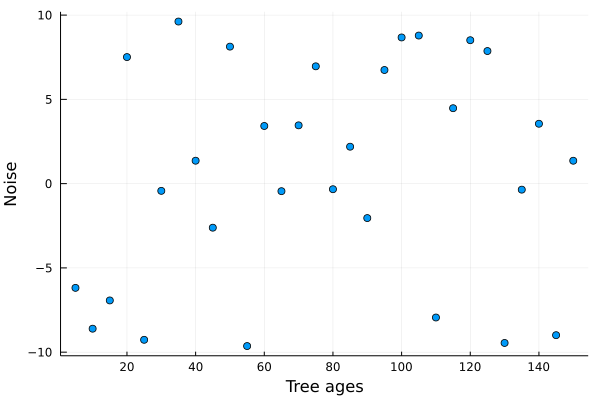

In [5]:
#verification plotting to ensure that you are generating data in the right range
#the points should be between -10 and 10 on the y axis
scatter(tree_ages,noise,xlabel = "Tree ages",ylabel = "Noise",label="")

In [6]:
noisy_heights = tree_heights .+ noise #add the errors to the heights

30-element Vector{Float64}:
 -3.6842093896198813
 -3.6069066029976646
  0.5694746510404913
 17.508945933528352
  3.233823010670939
 14.571516720563622
 27.117171917508355
 21.36010781233452
 19.885914967315355
 33.12886320648164
 17.862665532647316
 33.420695502382614
 32.05237463817656
  ⋮
 54.24220969458858
 58.67328213636706
 61.28572147024343
 47.05655926288407
 61.97548972892818
 68.50918539691405
 70.36727786951168
 55.54679836233447
 67.14278163203173
 73.55292242427835
 63.50840750270732
 76.35832255776165

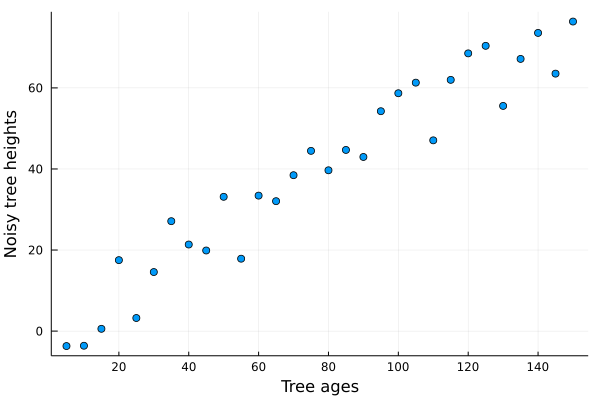

In [7]:
#"noise" is the term for error in your data: basically, the stuff you don't want to exist.
#look at how it's ruined our plot!

scatter(tree_ages,noisy_heights, xlabel = "Tree ages",ylabel = "Noisy tree heights",label = "")

Great, so we have successfully made a mess of our data. 
Let's suppose we only have access to noisy_heights. How would we fix this mess and get tree_heights?

One way is to average nearby elements together. 

The reason this should work is because of a difference in redundancy. For tree_heights, the linear trend is very, very easy to see. Even if we only had 3 or 4 data points, we could tell what the data is doing and predict future tree heights. So we have many more data points than we need.

However, the noise is random. It has no structure: we would never be able to completely predict it if we saw a few data points. So the noise does not have much redundancy.

When we average nearby elements, we are putting the data through a trial. The resilient portions of the data will make it through damaged but relatively unscathed, and the noise will not.

To average elements, we will use the mean(x) function, which calculates the average of all elements of x.

In [8]:
using Statistics 

#we can calculate an average using indexing
print(noisy_heights[1:3]) #the first three elements of our noisy data
first_three_average = mean(noisy_heights[1:3]) #the average of that vector

[-3.6842093896198813, -3.6069066029976646, 0.5694746510404913]

-2.240547113859018

In [9]:
#TODO: use indexing to make a function which calculates the average of some index noisy_heights[i] 
#and its surrounding elements, given an index i
a(i) = mean(noisy_heights[i-1:i+1])

#a quick test: the average of the first three elements should be a(2)
a(2)

-2.240547113859018

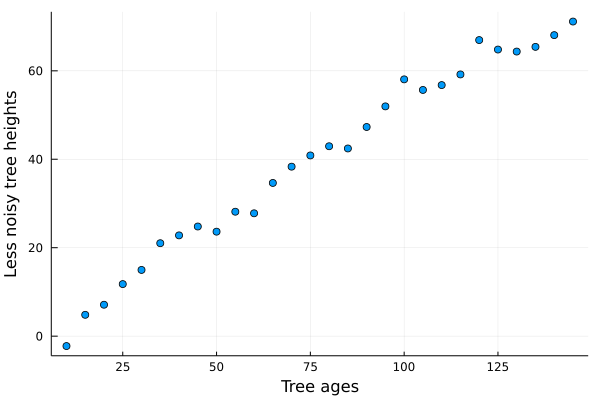

In [10]:
#Now we can calculate that neighbor average for each viable index.
#Note that we will have to throw out the first and last data points because they only have one neighbor in.

less_noisy_heights = a.(2:num_observations-1) #what range should we use?

scatter(tree_ages[2:end-1],less_noisy_heights, xlabel = "Tree ages",ylabel = "Less noisy tree heights",label = "")

That's definitely better than before, but not good enough. We got this result by taking the average of each data point with its neighbors, but we could perform a more drastic operation by taking averages across more points.

In [19]:
#calculate the average of the first 5 points in the dataset
print(noisy_heights[1:5]) #the first three elements of our noisy data
first_three_average = mean(noisy_heights[1:5]) #the average of that vector
noisy_heights

[-3.6842093896198813, -3.6069066029976646, 0.5694746510404913, 17.508945933528352, 3.233823010670939]

30-element Vector{Float64}:
 -3.6842093896198813
 -3.6069066029976646
  0.5694746510404913
 17.508945933528352
  3.233823010670939
 14.571516720563622
 27.117171917508355
 21.36010781233452
 19.885914967315355
 33.12886320648164
 17.862665532647316
 33.420695502382614
 32.05237463817656
  ⋮
 54.24220969458858
 58.67328213636706
 61.28572147024343
 47.05655926288407
 61.97548972892818
 68.50918539691405
 70.36727786951168
 55.54679836233447
 67.14278163203173
 73.55292242427835
 63.50840750270732
 76.35832255776165

In [23]:
#create a function which averages noisy_heights[i] with its neighbors, 2 steps in either direction.
get_3wise_neighbors(i) = noisy_heights[i-5:1:i+5]

b(i) = mean(get_2wise_neighbors(i))

b (generic function with 1 method)

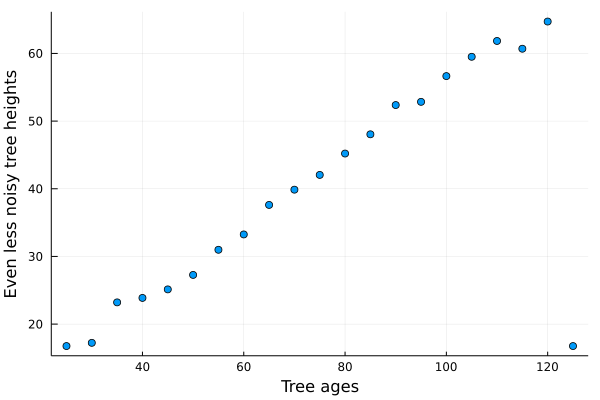

In [26]:
even_less_noisy_heights = b.(6 : 25) #what range should we use now?

scatter(tree_ages[5:end-5],even_less_noisy_heights, xlabel = "Tree ages",ylabel = "Even less noisy tree heights",label = "")

That's a lot better! 

Unfortunately, averaging also damages the real trend a lot of the time. Data analysis is a balancing act of throwing out the right amount and types of data so you can keep the signal (your real trend) and remove the noise.

Matrices are useful in a lot of ways, but one notable application lies in analysing images.
Consider a grayscale image. It is comprised of a large number of pixels which vary from black to grey to white.

So if an image is W pixels tall and H pixels wide, we can represent it as a W by H array of numbers, each of which has a value from 0 (black) to 1 (white). Values between 0 and 1 represent shades of gray. 

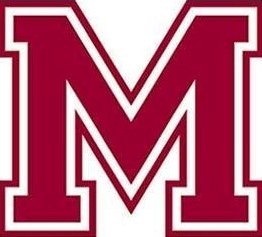

In [27]:
#We'll need the images package to import images
using Images
#Let's try importing the Morehouse logo to start.
morehouse_logo_image = load("morehouse.jpg") #this is grabbing an image in the same directory as the Jupyter Notebook

#Note that the morehouse logo is very simple: it has a lot of straight lines and very few frills. 
#This means that its redundancy is very high. 
#If we saw a portion of the logo, we could probably infer what the rest of it looked like.

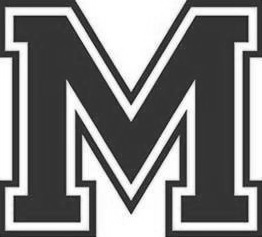

In [28]:
#Now, let's convert the logo to a grayscale matrix.
morehouse_grayscale_image = Gray.(morehouse_logo_image)

In [31]:
#from here, let's convert the logo to a matrix so we can work with it.
morehouse_matrix = convert(Array{Float64}, morehouse_grayscale_image)
morehouse_matrix[1:30,1]
#note that there is already noise in the image (we would expect the edges to be made of a uniform gray)
#this is because the image already had compression errors when it was found on the internet.

30-element Vector{Float64}:
 0.19215686274509805
 0.1843137254901961
 0.19607843137254902
 0.21568627450980393
 0.22745098039215686
 0.2196078431372549
 0.20784313725490197
 0.21176470588235294
 0.21176470588235294
 0.21176470588235294
 0.21176470588235294
 0.21176470588235294
 0.21176470588235294
 ⋮
 0.20784313725490197
 0.20784313725490197
 0.21176470588235294
 0.21176470588235294
 0.21176470588235294
 0.21176470588235294
 0.20784313725490197
 0.20784313725490197
 0.20784313725490197
 0.20784313725490197
 0.20784313725490197
 0.20784313725490197

In [51]:
#when you call size() without the second argument, it returns a set of the sizes along each dimension
height,width = size(morehouse_matrix) 

#okay, now let's add some real noise!
#TODO: create a matrix of values between -.2 and .2
#note that rand(h,w) creates a h by w matrix of entries between 0 and 1


#r = .4 * rand() - .2 #this is [0,.4] 

#noise = .4 .* rand(237,262) .- .2

(237, 262)

In [58]:
#okay, how does the image look now?
#You can display a matrix as a grayscale image by calling Gray.() to convert it.
noisy_morehouse_matrix = morehouse_matrix .+ noise
#Gray.(noisy_morehouse_matrix)

237×262 Matrix{Float64}:
 0.302898    0.180017   0.0470612  …   0.235821   0.210633   0.196469
 0.0350615   0.0976688  0.0230898      0.143912   0.0819188  0.143948
 0.244784    0.0889873  0.362889       0.404353   0.278965   0.13027
 0.251645    0.228811   0.365656       0.206494   0.2736     0.0667421
 0.35242     0.146237   0.0745134      0.0264804  0.04312    0.127634
 0.304598    0.128875   0.380257   …   0.307017   0.199038   0.315087
 0.216174    0.204861   0.301104       0.0468881  0.257566   0.217679
 0.0601058   0.111584   0.430664       0.317409   0.289956   0.388346
 0.192416    0.381823   0.133142       0.333317   0.400225   0.300429
 0.227001    0.265174   0.263738       0.285774   0.190961   0.0317438
 0.406902    0.264399   0.005726   …   0.112147   0.359854   0.0293317
 0.316735    0.0522332  0.104208       0.0277472  0.164733   0.145285
 0.172774    0.292326   0.116159       0.240094   0.092907   0.126326
 ⋮                                 ⋱              ⋮          
 

In [59]:
#TODO: Use indexing to get A[2,2] and the 8 elements immediately surrounding it.
#Note that the introduction has an example of using indexing to get pieces of matrices.
top_left_corner = noisy_morehouse_matrix[1:3,1:3]
#you can check your work by looking at the top corner of the output, 2 cells up.

#bottom right 5 by 5 square
bottom_right_corner = noisy_morehouse_matrix[235-2 : 235+2, 260-2:260+2 ] #centered on 236,261

#noisy_morehouse_matrix[237,262]

5×5 Matrix{Float64}:
 0.125112  0.33252    0.282379   0.223676  0.241111
 0.29218   0.120863   0.113467   0.377151  0.234655
 0.093244  0.401227   0.291554   0.03053   0.072639
 0.252361  0.222275   0.0122906  0.232919  0.0474246
 0.273038  0.143325  -0.0166252  0.294333  0.0471418

In [63]:
#Now try to apply the averaging strategy from before. 
#How do we get the 8 neighbors of some point (i,j) in this matrix?
[3,2]
noisy_morehouse_matrix[2:4,1:3]
#TODO create c, which returns the average of A[i,j] and the 8 elements surrounding it.
get_surrounding_eight(i,j) = noisy_morehouse_matrix[i-1:i+1,j-1:j+1]
#gets the 5 by 5 square with nmm[i,j] at the center
get_surrounding_bigsquare(i,j) = noisy_morehouse_matrix[i-2:i+2,j-2:j+2]
c(i,j) = mean(get_surrounding_eight(i,j))
d(i,j) = mean(get_surrounding_bigsquare(i,j))
c(2,2)

0.15360631098044408

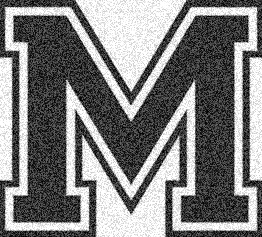

In [69]:
Gray.(noisy_morehouse_matrix)

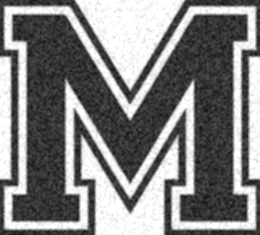

In [65]:
#now we can use broadcasting to calculate the average for each viable index. 
#TODO what are these ranges?
height_range = 2 : 236 
width_range = 2 : 261


#because this array is two dimensional we need to use the for command to loop over these values.
#the "for" command and the surrounding [] mean that for each (i,j) pair, we call c on it
#and put the result in the output matrix.
less_noisy_morehouse_matrix = [c(i,j) for i in height_range,j in width_range]
Gray.(less_noisy_morehouse_matrix)

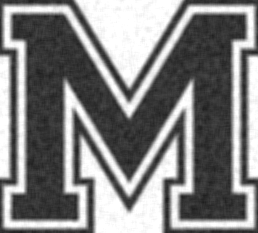

In [66]:
#Note that the graininess is a bit better, but the real image has gotten a lot more blurry...
#TODO: try various averaging sizes (at least one more) and see what works.
#You could try averaging everything within 2 indices of the main index, or 3 or more.
#Try to see how the size of our averaging operation effects the image.

height_range = 3 : 235 
width_range = 3 : 260


#because this array is two dimensional we need to use the for command to loop over these values.
#the "for" command and the surrounding [] mean that for each (i,j) pair, we call c on it
#and put the result in the output matrix.
less_noisy_morehouse_matrix = [d(i,j) for i in height_range,j in width_range]
Gray.(less_noisy_morehouse_matrix)